# Machine Learning Final Exam, Aug Semester, 2020

In this exam, you will demonstrate your understanding of the material from the lectures and labs.

For each question, insert your answer directly in this sheet. When complete, export the sheet as a PDF and upload to Gradescope.
Note that you have **2.5 hours** to do the exam. Also note that there are some short answer questions that you may be able to answer faster than the coding questions. You might consider answering those questions first to get as much credit as possible!

## Question 1 (10 points)

Download the [CSV dataset](http://www.cs.ait.ac.th/~mdailey/class/ml/final-exam-data.csv) for the exam.
Note that the data are two dimensional with labels '0' and '1'. Provide a scatter plot for the data with
the two classes shown in different colors.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch.autograd import Variable

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


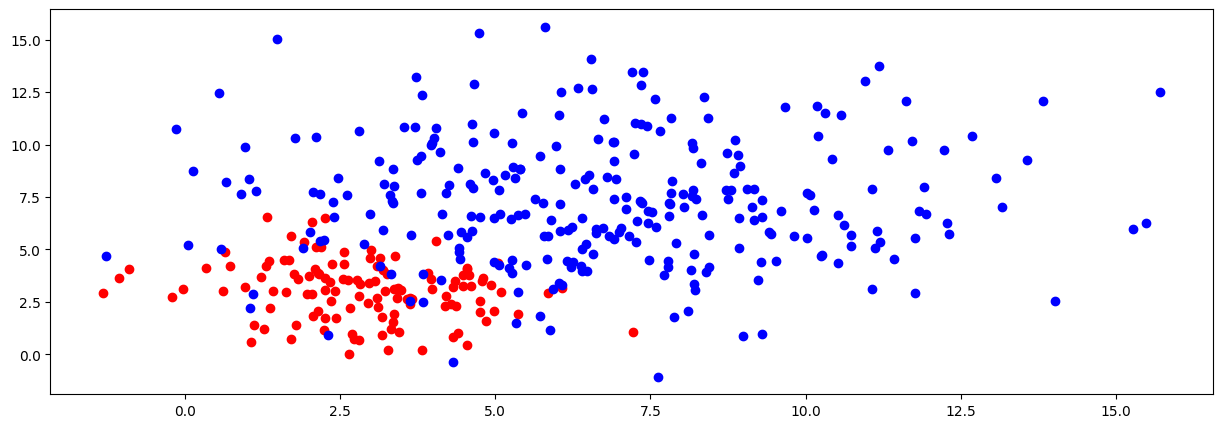

In [21]:
# Place code to load the data and plot the scatterplot here

df = pd.read_csv('final-exam-data.csv')
df = df.rename(columns={'# x1': 'x1'})
plt.figure(figsize=(15, 5))
plt.plot(df['x1'][df['y']==0], df['x2'][df['y']==0], 'ro')
plt.plot(df['x1'][df['y']==1],df['x2'][df['y']==1], 'bo')
plt.show()


## Question 2 (30 points)

Do the following:
1. Split the dataset from Question 1 into a training set (80%) and validation set (20%).
2. Using the logistic regression code we developed in lab, fit a logistic regression model to the data in the training set.
3. Indicate the training set accuracy and validation set accuracy of the logistic regression model.
4. Make two separate plots, one for the training set and one for the validation set, with three colors: one for correctly classified points from class 1, one for correctly classified points from class 2, and one for incorrectly classified points.

In [22]:
def normalize_data(data):
    
    means = np.mean(data, axis=0) # calculate mean
    stds = np.std(data, axis=0) # calculate std
    data_norm = (data - means) / stds # from formula = (x-mean)/std
    
    return data_norm

In [23]:
# Place code to split the data, fit the LR model, output accuracy, and plot the result here

import random
def partition(X, y, percent_train=0.8):
    m = y.shape[0]
    idx = np.arange(0,m)
    random.seed(1412)
    random.shuffle(idx)
    #percent_train = 0.6
    m_train = int(m * percent_train)
    train_idx = idx[:m_train]
    test_idx = idx[m_train:]
    X_train = X[train_idx]
    y_train = y[train_idx]
    X_test = X[test_idx]
    y_test = y[test_idx]
    return X_train, X_test,y_train, y_test

X = df[['x1', 'x2']].to_numpy()
y = df['y'].to_numpy()

X_train, X_val, y_train, y_val = partition(X, y, 0.8)

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)


(320, 2) (80, 2) (320,) (80,)


In [24]:
# y should be in the shape (m, n)
y_train = y_train.reshape(-1, 1)
y_val = y_val.reshape(-1, 1)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(320, 2) (80, 2) (320, 1) (80, 1)


In [25]:
# np.ones((shape))
intercept = np.ones((X_train.shape[0], 1))

# concatenate the intercept based on axis=1
X_train= np.concatenate((intercept, X_train), axis=1)

# np.ones((shape))
intercept = np.ones((X_val.shape[0], 1))

# concatenate the intercept based on axis=1
X_val = np.concatenate((intercept, X_val), axis=1)

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(320, 3) (80, 3) (320, 1) (80, 1)


In [26]:
def sigmoid(z):   
    return 1 / (1 + np.exp(-z))

def h(X, theta):
    return sigmoid(X @ theta)

def grad_j(X, y, y_pred):
    return X.T @ (y - y_pred) / X.shape[0]
    
def j_ep(theta, X, y):   
    epsilon = 1e-13
    y_pred = h(X, theta)
    error = (-y * np.log(y_pred+epsilon)) - ((1 - y) * np.log(1 - y_pred + epsilon))
    cost = sum(error) / X.shape[0]
    grad = grad_j(X, y, y_pred)
    return cost[0], grad

def j(theta, X, y):   
    
    y_pred = h(X, theta)
    error = (-y * np.log(y_pred)) - ((1 - y) * np.log(1 - y_pred))
    cost = sum(error) / X.shape[0]
    grad = grad_j(X, y, y_pred)
    return cost[0], grad

def train(X, y, theta_initial, alpha, num_iters):
    theta = theta_initial
    j_history = []
    for i in range(num_iters):
        cost, grad = j(theta, X, y)
        theta = theta + alpha * grad
        j_history.append(cost)
    return theta, j_history

In [27]:
theta_initial = np.zeros((X_train.shape[1], 1))
alpha = 0.001
num_iters = 200000
theta, j_history = train(X_train, y_train, theta_initial, alpha, num_iters)

print("Theta optimized:", theta)
print("Cost with optimized theta:", j_history[-1])

KeyboardInterrupt: 

In [ ]:

# j_history_list = []
# theta_list = []
# alpha_list = [0.01]
# theta_initial1 = np.zeros((X_train_norm.shape[1], 1))
# theta_initial_list = [theta_initial1]

# num_iters = 5000

# for alpha in alpha_list:
#     for theta_initial in theta_initial_list:
        
#         # YOUR CODE HERE
        
#         theta_i, j_history_i = train(X_train_norm, y_train, theta_initial, alpha, num_iters)
        
#         #raise NotImplementedError()
#         #theta_i, j_history_i = None, None
        
#         j_history_list.append(j_history_i)
#         theta_list.append(theta_i)

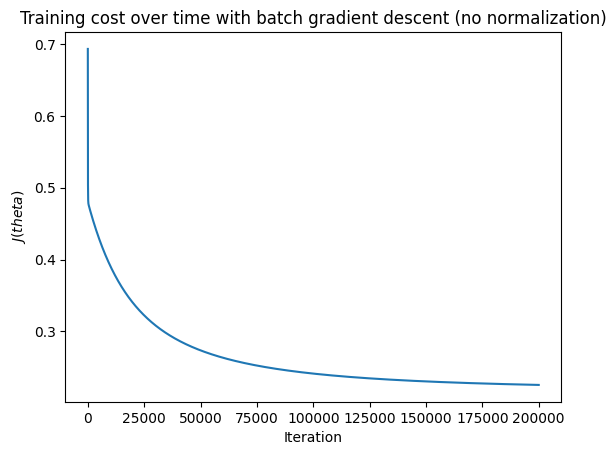

In [ ]:
plt.plot(j_history)
plt.xlabel("Iteration")
plt.ylabel("$J(theta)$")
plt.title("Training cost over time with batch gradient descent (no normalization)")
plt.show()

In [ ]:
def r_squared(y, y_pred):
    return 1 - (np.square(y - y_pred).sum() / np.square(y - y.mean()).sum())

In [ ]:
def get_accuracy(X, y, theta):
    y_test_pred_soft_norm = h(X, theta)
    y_test_pred_hard_norm = (y_test_pred_soft_norm > 0.5).astype(int)
    test_rsq_soft_norm = r_squared(y, y_test_pred_soft_norm)
    test_rsq_hard_norm = r_squared(y, y_test_pred_hard_norm)
    test_acc_norm = (y_test_pred_hard_norm == y).astype(int).sum() / y.shape[0]
    return test_rsq_soft_norm, test_rsq_hard_norm, test_acc_norm

In [ ]:
train_r2_soft, train_r2_hard, train_acc = get_accuracy(X_train, y_train, theta)
val_r2_soft, val_r2_hard, val_acc = get_accuracy(X_val, y_val, theta)

print(f'Train: R2 soft {train_r2_soft:.2f} R2 hard {train_r2_hard:.2f} Accuracy {train_acc:.2f} ')
print(f'Validation: R2 soft {val_r2_soft:.2f} R2 hard {val_r2_hard:.2f} Accuracy {val_acc:.2f} ')


Train: R2 soft 0.69 R2 hard 0.62 Accuracy 0.92 
Validation: R2 soft 0.63 R2 hard 0.44 Accuracy 0.89 


In [ ]:
def boundary_points(X, theta):
    v_orthogonal = np.array([[theta[1,0]],[theta[2,0]]])
    v_ortho_length = np.sqrt(v_orthogonal.T @ v_orthogonal)
    dist_ortho = theta[0,0] / v_ortho_length
    v_orthogonal = v_orthogonal / v_ortho_length
    v_parallel = np.array([[-v_orthogonal[1,0]],[v_orthogonal[0,0]]])
    projections = X @ v_parallel
    proj_1 = min(projections)
    proj_2 = max(projections)
    point_1 = proj_1 * v_parallel - dist_ortho * v_orthogonal
    point_2 = proj_2 * v_parallel - dist_ortho * v_orthogonal
    return point_1, point_2

In [ ]:
# Change 0.something to 0 or 1
def convert_soft_to_hard(yhat):
    for index, i in enumerate(yhat):
        if i > 0.5:
            yhat[index] = 1
        else:
            yhat[index] = 0
    
    return yhat

yhat_train = h(X_train, theta)
yhat_train = convert_soft_to_hard(yhat_train)
yhat_val = h(X_val, theta)
yhat_val = convert_soft_to_hard(yhat_val)
print(np.unique(yhat_train, return_counts=True))
print(np.unique(yhat_val, return_counts=True))


(array([0., 1.]), array([103, 217]))
(array([0., 1.]), array([21, 59]))


In [ ]:
def find_point(yhat, ytest):
    Correct_class0 = []
    Correct_class1 = []
    Incorrect = []
    for index, i in enumerate(yhat):
        if (i == 0) and (ytest[index] == 0):
            Correct_class0.append(index)
        elif (i == 1) and (ytest[index] == 1):
            Correct_class1.append(index)
        else:
            Incorrect.append(index)
    return Correct_class0, Correct_class1, Incorrect

train_Cor0, train_Cor1, train_Incor = find_point(yhat_train, y_train)
val_Cor0, val_Cor1, val_Incor = find_point(yhat_val, y_val)

# convert to numpy array
train_Cor0, train_Cor1, train_Incor = np.array(train_Cor0), np.array(train_Cor1), np.array(train_Incor)
val_Cor0, val_Cor1, val_Incor = np.array(val_Cor0), np.array(val_Cor1), np.array(val_Incor)


In [ ]:
print(train_Cor0.shape, train_Cor1.shape, train_Incor.shape)
print(val_Cor0.shape, val_Cor1.shape, val_Incor.shape)

(89,) (205,) (26,)
(17,) (54,) (9,)


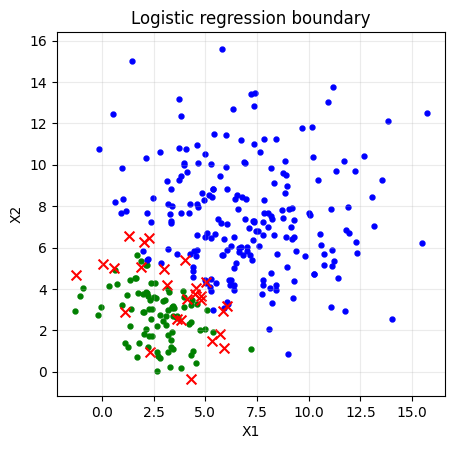

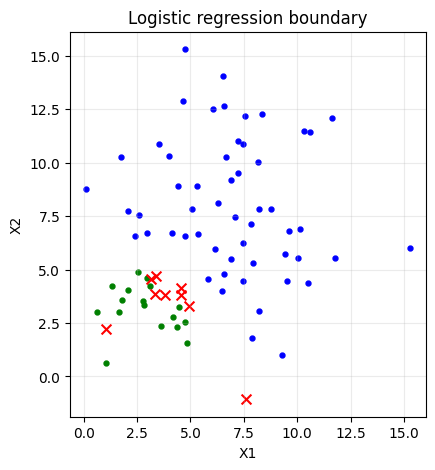

In [ ]:
def plot_points(X, cor0, cor1, incor):
    fig1 = plt.figure(figsize=(5,5)) 
    ax = plt.axes() 
    ax.set_aspect(aspect = 'equal', adjustable = 'box')
    plt.title('Logistic regression boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.grid(axis='both', alpha=.25)
    ax.scatter(X[:, 1][cor0], X[:, 2][cor0], s=50, c='g', marker='.', label='y = 0')
    ax.scatter(X[:, 1][cor1], X[:, 2][cor1], s=50, c='b', marker='.', label='y = 0')
    ax.scatter(X[:, 1][incor], X[:, 2][incor], s=50, c='r', marker='x', label='y = 0')

plot_points(X_train, train_Cor0, train_Cor1, train_Incor)
plot_points(X_val, val_Cor0, val_Cor1, val_Incor)
    

## Question 3 (20 points)

Repeat Question 2 using the PyTorch neural network library. Your PyTorch model should have a single linear layer with two inputs and a single output, a logistic sigmoid activation function, binary cross entropy loss function, and stochastic gradient descent for the optimizer. Show the same plots you showed for Question 2.

In [ ]:
# Place code to build, train, and evaluate your PyTorch model here

import torch   #general pytorch
import torch.nn as nn  #neural network module
import torch.nn.functional as F  #useful functions like softmax, or relu

#pip install torchvision; conda install torchvision
from torchvision import datasets, transforms  #transforms for image processing
from torch.utils.data import DataLoader       #dataloader for preparing batch

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
from torch.autograd import Variable


/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# Place code to split the data, fit the LR model, output accuracy, and plot the result here

import random
def partition(X, y, percent_train=0.8):
    m = y.shape[0]
    idx = np.arange(0,m)
    random.seed(1412)
    random.shuffle(idx)
    #percent_train = 0.6
    m_train = int(m * percent_train)
    train_idx = idx[:m_train]
    test_idx = idx[m_train:]
    X_train = X[train_idx]
    y_train = y[train_idx]
    X_test = X[test_idx]
    y_test = y[test_idx]
    return X_train, X_test,y_train, y_test

X = df[['x1', 'x2']].to_numpy()
y = df['y'].to_numpy()

X_train, X_val, y_train, y_val = partition(X, y, 0.8)

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

# y should be in the shape (m, n)
y_train = y_train.reshape(-1, 1)
y_val = y_val.reshape(-1, 1)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)


(320, 2) (80, 2) (320,) (80,)
(320, 2) (80, 2) (320, 1) (80, 1)


In [ ]:
X_train_tensor = torch.tensor(X_train)
y_train_tensor = torch.tensor(y_train)
X_val_tensor = torch.tensor(X_val)
y_val_tensor = torch.tensor(y_val)

print(type(X_train_tensor), type(y_train_tensor))

<class 'torch.Tensor'> <class 'torch.Tensor'>


In [ ]:
class LinearModel(nn.Module):
    
    def __init__(self, input_size, output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.layer1(x)
        out = self.sigmoid(out)
        
        return out

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [ ]:
model = LinearModel(2, 1).to(device)
model

LinearModel(
  (layer1): Linear(in_features=2, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [ ]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.0001)

In [ ]:
epochs = 500
batch_size = 10
loss_log = []
y_true = []
y_pred = []
train_yhat = []
running_loss = 0
total_loss = 0

for e in range(epochs):
    for i in range(0, X_train_tensor.shape[0], batch_size):
        x_mini = X_train_tensor[i:i + batch_size].to(torch.float32)
        y_mini = y_train_tensor[i:i + batch_size].to(torch.float32)
        
        x_var = Variable(x_mini, requires_grad=True).to(device)
        y_var = Variable(y_mini, requires_grad=True).to(device)

        # Forward pass
        output = model(x_var.float())
        #loss = criterion(output, y_var.unsqueeze(1)) 
        loss = criterion(output, y_var)

        # Append loss
        loss_log.append(loss)

        # Backward propagation and optimizer
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Running loss
        running_loss += loss.item() * x_var.size(0)
        epoch_loss = running_loss / X_train_tensor.shape[0]
        
        # Predict
        pred = np.round(output.detach().cpu().numpy())
        y_var = y_var.float()
        y_true.extend(y_var.tolist()) 
        y_pred.extend(pred.reshape(-1).tolist())
        

    #if e % 50 == 1:
        #print(f'Epochs {e:2.0f}, Loss = {epoch_loss:.5f} Accuracy = {accuracy_score(y_true,y_pred)}')
        #loss_log.append(loss.item())
        
#print(" Total Loss is ", loss.item())
print("Accuracy on training set is" , accuracy_score(y_true,y_pred))

KeyboardInterrupt: 

In [ ]:
model.eval()
y_true = []
y_pred = []
#val_yhat = []
with torch.no_grad():
    for i in range(X_val.shape[0]):
        x_mini = X_train_tensor[i].to(torch.float32)
        y_mini = y_train_tensor[i].to(torch.float32)
        
        x_var = Variable(x_mini, requires_grad=False).to(device)
        y_var = Variable(y_mini, requires_grad=False).to(device)

        # Create model on data
        output = model(x_var.float())
                    
        #PREDICTIONS
        pred = np.round(output.detach().cpu().numpy())
        #val_yhat.append(pred)
        target = y_var.float()
        y_true.extend(y_var.tolist()) 
        y_pred.extend(pred.reshape(-1).tolist())

        
print("Accuracy on validation set is" , accuracy_score(y_true,y_pred))
print("***********************************************************")


Accuracy on validation set is 0.725
***********************************************************


In [ ]:
# Extract weights and bias from model
model_weight = list(model.parameters())[0].data.cpu().numpy()
model_bias = list(model.parameters())[1].data.cpu().numpy()

# Reshape model_bias
model_bias = model_bias.reshape(1, -1)

# Concatate weight and bias to create linear theta
linear_theta = np.concatenate((model_bias, model_weight), axis=1)
print(linear_theta.shape)

# Fix linear theta shape
linear_theta = linear_theta.reshape(-1, 1)
linear_theta.shape


(1, 3)


(3, 1)

In [ ]:
# np.ones((shape))
intercept = np.ones((X_train.shape[0], 1))

# concatenate the intercept based on axis=1
X_train= np.concatenate((intercept, X_train), axis=1)

# np.ones((shape))
intercept = np.ones((X_val.shape[0], 1))

# concatenate the intercept based on axis=1
X_val = np.concatenate((intercept, X_val), axis=1)

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)#

(320, 3) (80, 3) (320, 1) (80, 1)


In [ ]:
# Change 0.something to 0 or 1
def convert_soft_to_hard(yhat):
    for index, i in enumerate(yhat):
        if i > 0.5:
            yhat[index] = 1
        else:
            yhat[index] = 0
    
    return yhat

yhat_train = h(X_train, linear_theta)
yhat_train = convert_soft_to_hard(yhat_train)
yhat_val = h(X_val, linear_theta)
yhat_val = convert_soft_to_hard(yhat_val)
print(np.unique(yhat_train, return_counts=True))
print(np.unique(yhat_val, return_counts=True))


(array([1.]), array([320]))
(array([1.]), array([80]))


In [ ]:
def find_point(yhat, ytest):
    Correct_class0 = []
    Correct_class1 = []
    Incorrect = []
    for index, i in enumerate(yhat):
        if (i == 0) and (ytest[index] == 0):
            Correct_class0.append(index)
        elif (i == 1) and (ytest[index] == 1):
            Correct_class1.append(index)
        else:
            Incorrect.append(index)
    return Correct_class0, Correct_class1, Incorrect

train_Cor0, train_Cor1, train_Incor = find_point(yhat_train, y_train)
val_Cor0, val_Cor1, val_Incor = find_point(yhat_val, y_val)

# convert to numpy array
train_Cor0, train_Cor1, train_Incor = np.array(train_Cor0), np.array(train_Cor1), np.array(train_Incor)
val_Cor0, val_Cor1, val_Incor = np.array(val_Cor0), np.array(val_Cor1), np.array(val_Incor)
print(train_Cor0.shape, train_Cor1.shape, train_Incor.shape)
print(val_Cor0.shape, val_Cor1.shape, val_Incor.shape)

(0,) (219,) (101,)
(0,) (58,) (22,)


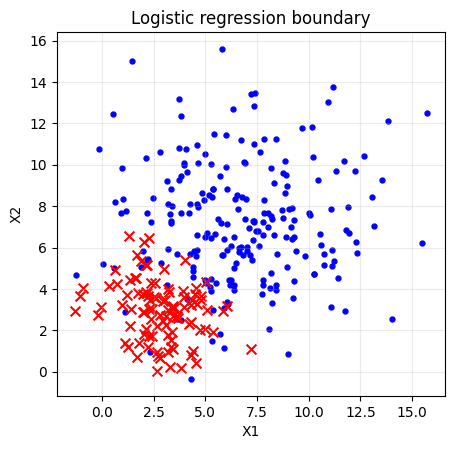

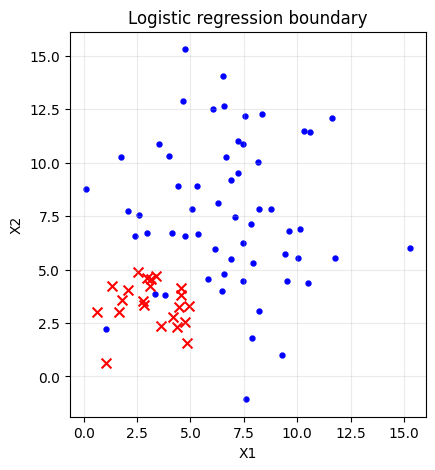

In [ ]:
def plot_points(X, cor0, cor1, incor):
    fig1 = plt.figure(figsize=(5,5)) 
    ax = plt.axes() 
    ax.set_aspect(aspect = 'equal', adjustable = 'box')
    plt.title('Logistic regression boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.grid(axis='both', alpha=.25)
    if len(cor0) != 0:
        ax.scatter(X[:, 1][cor0], X[:, 2][cor0], s=50, c='g', marker='.', label='y = 0')
    ax.scatter(X[:, 1][cor1], X[:, 2][cor1], s=50, c='b', marker='.', label='y = 0')
    ax.scatter(X[:, 1][incor], X[:, 2][incor], s=50, c='r', marker='x', label='y = 0')

plot_points(X_train, train_Cor0, train_Cor1, train_Incor)
plot_points(X_val, val_Cor0, val_Cor1, val_Incor)

## Question 4 (20 points)

Add a 10-unit hidden layer with ReLU activation to the PyTorch model from Question 3. Plot training loss and validation loss as function of epoch of training. Do you see any evidence of overfitting?

In [28]:
# Place code to split the data, fit the LR model, output accuracy, and plot the result here

import random
def partition(X, y, percent_train=0.8):
    m = y.shape[0]
    idx = np.arange(0,m)
    random.seed(1412)
    random.shuffle(idx)
    #percent_train = 0.6
    m_train = int(m * percent_train)
    train_idx = idx[:m_train]
    test_idx = idx[m_train:]
    X_train = X[train_idx]
    y_train = y[train_idx]
    X_test = X[test_idx]
    y_test = y[test_idx]
    return X_train, X_test,y_train, y_test

X = df[['x1', 'x2']].to_numpy()
y = df['y'].to_numpy()

X_train, X_val, y_train, y_val = partition(X, y, 0.8)

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

# y should be in the shape (m, n)
y_train = y_train.reshape(-1, 1)
y_val = y_val.reshape(-1, 1)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

X_train_tensor = torch.tensor(X_train)
y_train_tensor = torch.tensor(y_train)
X_val_tensor = torch.tensor(X_val)
y_val_tensor = torch.tensor(y_val)

(320, 2) (80, 2) (320,) (80,)
(320, 2) (80, 2) (320, 1) (80, 1)


In [29]:
# Place code to build, train, and evaluate your PyTorch model here

class LinearModel(nn.Module):
    
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.relu(out)
        out = self.sigmoid(out)
        
        return out

In [30]:
hidden_size = 10
model = LinearModel(2, hidden_size, 1).to(device)
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.0005)

In [32]:
epochs = 500
batch_size = 10
loss_log = []
y_true = []
y_pred = []
y_true_val = []
y_pred_val = []
train_yhat = []
val_loss_list = []
running_loss = 0
total_loss = 0

for e in range(epochs):
    for i in range(0, X_train_tensor.shape[0], batch_size):
        x_mini = X_train_tensor[i:i + batch_size].to(torch.float32)
        y_mini = y_train_tensor[i:i + batch_size].to(torch.float32)
        
        x_var = Variable(x_mini, requires_grad=True).to(device)
        y_var = Variable(y_mini, requires_grad=True).to(device)

        # Forward pass
        output = model(x_var.float())
        #loss = criterion(output, y_var.unsqueeze(1)) 
        loss = criterion(output, y_var)

        # Append loss
        loss_log.append(loss)


        # Running loss
        #running_loss += loss.item() * x_var.size(0)
        #epoch_loss = running_loss / X_train_tensor.shape[0]
        
        # Predict
        pred = np.round(output.detach().cpu().numpy())
        y_var = y_var.float()
        y_true.extend(y_var.tolist()) 
        y_pred.extend(pred.reshape(-1).tolist())
        
        # Backward propagation and optimizer
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    with torch.no_grad():
        for i in range(X_val.shape[0]): # Basically use the batch size of 1 to validate
            val_x_mini = X_val_tensor[i].to(torch.float32)
            val_y_mini = y_val_tensor[i].to(torch.float32)
            
            val_x_var = Variable(x_mini, requires_grad=False).to(device)
            val_y_var = Variable(y_mini, requires_grad=False).to(device)

            # Create model on data
            val_output = model(val_x_var.float())

            # Validation loss
            val_loss = criterion(val_output, val_y_var)
            val_loss_list.append(val_loss)
            
                        
            #PREDICTIONS
            pred = np.round(output.detach().cpu().numpy())
            #val_yhat.append(pred)
            target = val_y_var.float()
            y_true_val.extend(val_y_var.tolist()) 
            y_pred_val.extend(pred.reshape(-1).tolist())




        if e % 50 == 0:
            print(f'Epochs {e:2.0f}, Validation Loss = {val_loss:.5f} Validation Accuracy = {accuracy_score(y_true_val, y_pred_val)}')
        
        # # Backward propagation and optimizer
        # optimizer.zero_grad()
        # loss.backward()
        # optimizer.step()
        

    if e % 50 == 0:
        print(f'Epochs {e:2.0f}, Loss = {loss:.5f} Accuracy = {accuracy_score(y_true,y_pred)}')
        #loss_log.append(loss.item())
        
#print(" Total Loss is ", loss.item())
print("Accuracy on training set is" , accuracy_score(y_true,y_pred))

Epochs  0, Validation Loss = 0.47867 Validation Accuracy = 0.7
Epochs  0, Loss = 0.47907 Accuracy = 0.6875
Epochs 50, Validation Loss = 0.40156 Validation Accuracy = 0.7
Epochs 50, Loss = 0.40177 Accuracy = 0.6848651960784313
Epochs 100, Validation Loss = 0.37222 Validation Accuracy = 0.7
Epochs 100, Loss = 0.37241 Accuracy = 0.6851175742574257
Epochs 150, Validation Loss = 0.35271 Validation Accuracy = 0.7258278145695364
Epochs 150, Loss = 0.35305 Accuracy = 0.6889486754966887
Epochs 200, Validation Loss = 0.33641 Validation Accuracy = 0.7442786069651741
Epochs 200, Loss = 0.33670 Accuracy = 0.6959888059701492
Epochs 250, Validation Loss = 0.32335 Validation Accuracy = 0.7705179282868526
Epochs 250, Loss = 0.32378 Accuracy = 0.7039840637450199
Epochs 300, Validation Loss = 0.31496 Validation Accuracy = 0.7920265780730897
Epochs 300, Loss = 0.31534 Accuracy = 0.7123857973421927
Epochs 350, Validation Loss = 0.30632 Validation Accuracy = 0.8074074074074075
Epochs 350, Loss = 0.30666 Acc

*Discuss whether you observe overfitting here.*

First, The validation accuracy is higher than training accuracy because in this network we use the relu.
The relu activation function force the model to not activate all the neurons at the same time thus is the
reason for lower accuracy of training set.

After that the model start to learn and validation and accruacy is very close and 
It not show any sign of overfitting.

## Question 5 (10 points)

In fact, the data from Question 1 were generated from a Gaussian mixture model. If you were given the data without the labels, for unsupervised learning, do you think the EM algorithm for Gaussian mixtures with $k=2$ components would recover the two classes? Why or why not?

*Discuss here.*

Yes, it can recover the two classes but not completely. In order to generated data from gaussian mixture model we need to have mean, co-variance and initial weights (phi). We can use EM algorithms on the data to find the best possible ground truth parameters (In this case
mean, co-variance and initial weight). Those parameters should be close to the one that we use to generated but it impossible for it to
be extacly the same.


## Question 6 (10 points)

Consider the following problem: Students taking classes in Room TC 103 often feel the room is too cold or too hot. To solve the problem, we connect three air conditioners' on/off switches to a computer, place a temperature sensor outdoors next to the room, and put a button box on each student's desk with 3 buttons, labeled "I'm freezing," "I'm sweating", and "I feel good." Students can press any of the three buttons to indicate their comfort level. Every 10 minutes, the outdoor temperature is measured in degrees Celsius, and the current comfort level of each student (1, 2, or 3) is measured. The system gets the measurements as input and then has to set the control for each of the three air conditioners to high, low, or off for the next 10 minutes.

Suppose you would like to build a reinforcement learning agent to optmize the air conditioning control for the room. Do the following:

1. Briefly explain the state space, action space, reward function, and discount factor you think should be used for this problem.
2. Briefly explain the reason it is difficult to know the transition probabilities for this problem.
3. Briefly describe how you could use a neural network to learn the state transition probabilities.

*Write your explanations here.*

Goal : make the student feel comfortable (not too hot or too cold), (Find pi(s) = a)
state : sweating, comfortable, freezing (3 states)
action:  decrease temperature, turn off (In this case I assume that it will make no change to temperature), increase temperature

reward:
        decrease temperature, turnoff, increase tempearature
state0 : [1,                     0,              -1]
state1 : [0,                     1,               0]
state2 : [-1,                    0,               1]

discount factor: 0 I don't think we need to cares about the reward in the future. In this case we are hot or cold! we need
to be comfortable immediately and we also know that the class (environment) will come to an end soon (assume that the class
is 3 hrs)

Q2.
It is difficult to know the transition probabilities because it is difficult to determine the perfect temperature for each person.
For example someone may go from sweating to freezing by just one temperature drop. The other reason is because we can have more than
one person thus the state and reward may differ from each other but we only have one environment (everyone is in the same room)

Q3. 
In this case, I think we can use Deep-Q-Learning but it ways to overkill. In this particular problem I think it should be suffice to just use Q-learning algorithm.
